# Zooming in on Hollywood

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **What this project is about**: Welcome to this movies data investigation/analysis project. In this project, I seek to deepdive into TMDb dataset, and gain insights into how different movies produced over the years have been performing, and maybe observe some trends that may be used as a basis for certain recommendations and action plans. The dataset used contains information about 10,000 movies collected from The Movie Database (TMDb).

> The analyses in this project will be guided by the followung research questions:
> <ol>
    <li> Which movie genres have been more popular over the years?
    <li> Who were the most engaged directors in the industry?
    <li> Which movies have been voted as most popular by viewers?
    <li> What are the Top 10 rated movies?
    <li> How have movie productions performed financially over the years?
    <li> What are the possible explanations for these performances?

### Before we begin, let's import all the necessary packages and begin to set up workflow

In [1]:
#import all packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Main Task**: Here, we'll load the dataset we'll be using into a dataframe within the notebook environment, and inspect the data to have an idea of some general properties of the dataset and its columns

### General Properties

In [2]:
#let's load the data first and do some inspection

movies_df = pd.read_csv('tmdb-movies.csv') #reads data into a dataframe named 'movies_df'

print(movies_df.shape) #displays the number of rows and columns of the dataframe

print(movies_df.info()) #gives an overview of the dataframe and info about its columns

movies_df.head(2) #displays first few (2, in this case) rows of the dataframe

(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


#### From the outputs of our inspections above, we see:
> <ol type = "i">
    <li> That there are 10,866 rows and 21 columns in the movies dataset
    <li> That some columns (eg. imdb_id, cast, homepage, director, tagline, keywords etc.) contain missing data
    <li> The data types of each column

In [3]:
#let's check for missing data points and instances of duplicated rows

print(movies_df.isna().sum()/len(movies_df)*100)    #checks for the rate of missing data in each column

print(movies_df.duplicated().sum())                 #checks the number of duplicate rows in the dataframe

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64
1


> From the above, we can see the columns that contain missing data and the percentage of data points missing, the decision about what to do with these columns will be made in the cleaning phase of this project.
We can also see that only 1 record is duplicated, we can easily drop the duplicate row without panic

#### Now that we have an idea of the state of our data, let's proceed to cleaning it

### Data Cleaning

In [4]:
#I usually like to see my dataframe again before cleaning, just to keep it in view and for 'context'
#so, let's view the first three rows

movies_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
#Now, let's begin to clean the data
#first thing we'll do is remove columns we won't be needing for this analysis
#let's define the unwanted columns in a list and call the list when needed to remove the columns

unwanted_columns = ['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview']

#let's remove the above columns from our dataframe
movies_df.drop(unwanted_columns, axis=1, inplace=True)

In [6]:
#Now, let's see what our dataframe looks like now

movies_df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### It appears we have two revenue and budget columns, one each for actual and adjusted (for 2010 dollar value)
##### So, we have to decide which ones to keep, and which ones to drop (actual vs. adjusted)
##### For the purpose of this project, considering it's tentative and mere exploratory nature, we are allowed to work with the actual values, which i have decided in favour of. So, we can drop the adjusted values columns

In [7]:
#dropping the adjusted revenue and budget columns

adj_columns = ['budget_adj', 'revenue_adj']
movies_df.drop(adj_columns, axis=1, inplace=True)

In [8]:
#let's see what we have now

movies_df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


##### Another thing we could do with our data to get it ready for analysis is to create a 'profit' column as I am interested in investigating profitability as well.
#### Here, i define profit as *revenue* - *budget*

In [9]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget'] #creates the 'profit' column 

#let's see what we have
movies_df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1316249360


In [10]:
#Let's inspect one more time
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  profit                10866 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [11]:
movies_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,2.519762e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,9.658799e+07
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,-4.139124e+08
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,9.083358e+06
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,2.544506e+09


💡 can see that **director**, **genres**, and **production_companies** columns still have missing data. Dealing with these could be a bit tricky, as they are of string/object data types. But, we can decide to drop **production_companies** column as it may not be an important feature in our analysis, and then drop the rows where the **director** and **genres** columns are null. Doing this pose only a little shrinking of our data, as the null values in these columns are only but a few.

💡Checking the output of the describe function, we see that there are movies with budget of 0 or less. We can confirm how many records contain such instances and factor it into our analysis when we commence EDA

In [12]:
print((movies_df['budget']<= 0).sum())

5696


In [13]:
#drop production_companies from our model
movies_df.drop('production_companies', axis=1, inplace=True)

#let's also remove duplicate rows from our dataset in case there are any
movies_df.drop_duplicates()

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,6/15/66,11,7.4,1966,0
10862,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,12/21/66,20,5.7,1966,0
10863,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,1/1/66,11,6.5,1966,0
10864,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,11/2/66,22,5.4,1966,0


###### Now, let's drop empty rows from the 'director' and 'genres' columns

In [14]:
movies_df.dropna(how='any', subset=['genres'], inplace=True) #drops rows from dataframe where 'genres' is empty

In [15]:
movies_df.dropna(how='any', subset=['director'], inplace=True) #drops rows from dataframe where 'director' is empty

#### Let's conduct a final inspection to see the current state of our data

In [16]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10801 non-null  float64
 1   budget          10801 non-null  int64  
 2   revenue         10801 non-null  int64  
 3   original_title  10801 non-null  object 
 4   director        10801 non-null  object 
 5   runtime         10801 non-null  int64  
 6   genres          10801 non-null  object 
 7   release_date    10801 non-null  object 
 8   vote_count      10801 non-null  int64  
 9   vote_average    10801 non-null  float64
 10  release_year    10801 non-null  int64  
 11  profit          10801 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


###### Looks like our data is well cleaned now. There are no missing values, no rows are duplicated, and only necessary features are 'featured' (pun intended 😉😁). However, we have to remember to treat the 0 or less budget values in our analysis.
##### With this, we can begin to deepdive into the data, conduct some Exploratory Data Analysis (EDA).

<a id='eda'></a>
## Exploratory Data Analysis

> **Main Task**: In this section, we hope to find patterns and trends about movies performance. These analyses, however, are tentative, and can be improved upon with further analyses to aid more informed decision making. The main goal of this analysis is just to explore the data set and see some trends and compute simple summary statistics that gives us an idea of what's happening with the dataset. 

> Our analysis will be guided by the research questions posed in the introduction section.

### Preliminary Exploration
#### Checking the distribution of all numeric columns

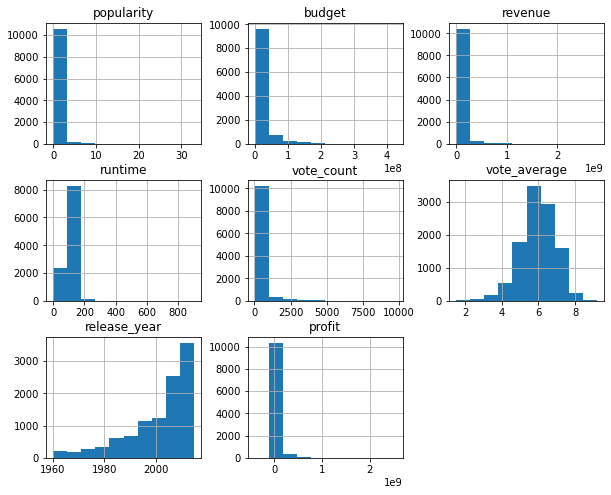

In [17]:
movies_df.hist(figsize=(10,8));

#### 💡Few things to observe from the above is that:
> <ol>
    <li> Post 2000 saw more movie releases than previous years
    <li> On the average, votes from 5-7 were more popular 
    <li> Most features have values that are not centrally distributed, save for vote average

### Research Question 1: Which movie genres have been more popular over the years?
> Observing the 'genres' column, we notice that some movies appear to have more than one genre (separated by '|'). I'm assuming that the predominant genre is the one captured first. So, we have to split the genres column to have a more useful result to conduct our analysis of the most popular genre

In [18]:
#first, I define a function to carry out the split operation

def split_column(column):
    split_column = movies_df[column].str.cat(sep = '|')
    
    split_column = pd.Series(split_column.split('|'))
    
    #counts the values and sorts them in descending order
    counts = split_column.value_counts(ascending = False)
    
    return counts

In [19]:
#now, i call the split_column function defined above to split the 'genres' column
genre=split_column('genres')

Text(0.5, 1.0, 'Movie genres by popularity')

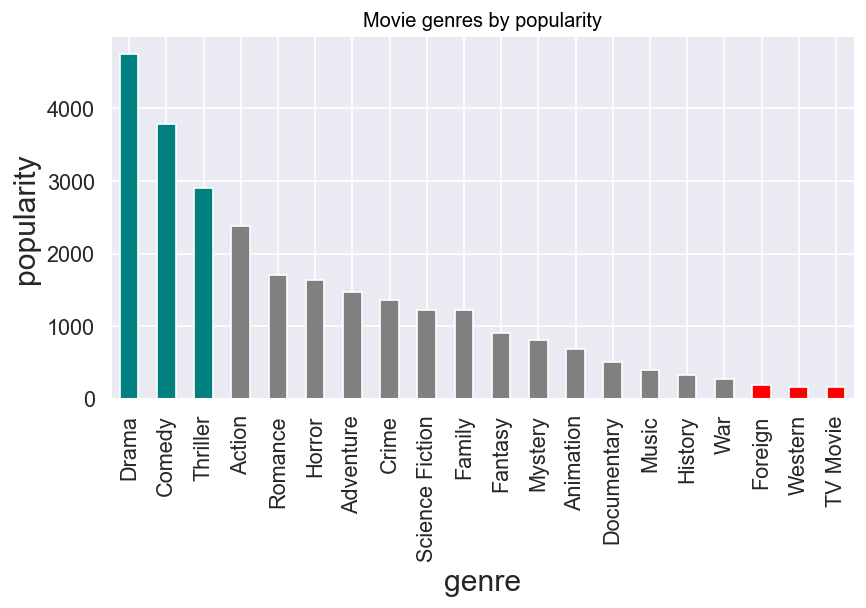

In [32]:
#now, i visualize the most popular genres over the years

plt.figure(figsize=(8,4), dpi = 120)
genre.plot.bar(fontsize = 13,color=['teal', 'teal', 'teal', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'red', 'red', 'red'])
plt.xlabel('genre')
plt.ylabel('popularity')
plt.title('Movie genres by popularity', color = 'black', fontsize = '12')

> 💡We can see from the chart above that the top 3 popular movies are **Drama**, **Comedy**, and **Thriller**, and the least 3 popular movies are **Foreign**, **Western**, and **TV Movie**. It's actually not a suprise considering the fact that Thrillers and Sci-fi movies only recently started getting popular. 

### Research Question 2: Who were the most engaged directors in the industry?

> For this question, we have two define what engagement means. In this case, most engaged directors would be those who have the most movie direction counts over the time frame of analysis.

In [21]:
#first i create dataframe for top 10 directors
#i have to split the director column following the same logic adopted in spliting genres
#i simply have to call the split function defined earlier

t10_directors=split_column('director')[:10]

#let's see what we have
print(t10_directors)

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Ridley Scott         23
Steven Soderbergh    23
Ron Howard           22
Joel Schumacher      21
Tim Burton           20
Brian De Palma       20
dtype: int64


Text(0, 0.5, 'popularity')

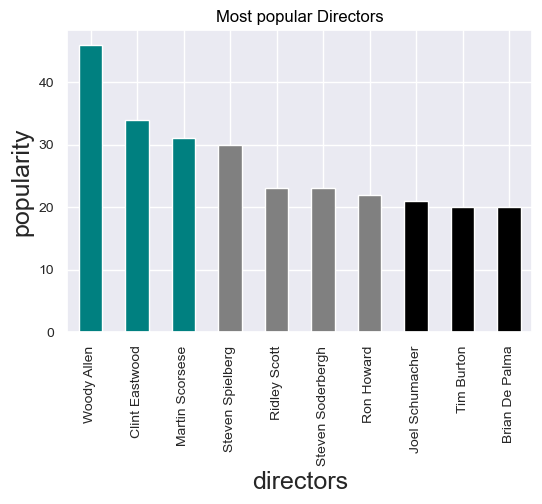

In [34]:
#let's visualize our top10 directors dataframe

plt.figure(figsize=(6,4), dpi = 100)
t10_directors.plot.bar(fontsize= 10,color=['teal', 'teal', 'teal', 'grey', 'grey', 'grey', 'grey', 'black', 'black', 'black', ])
plt.title('Most popular Directors', color = 'black', fontsize = '12')
plt.xlabel('directors')
plt.ylabel('popularity')

> 💡From the output of the chart, we see that **Woody Allen** directed most movies over the years and was most popular amongst his colleagues at the time. He was mostly the go-to guy during those years. He was followed by **Clint Eastwood (one of my favorites, by the way)**, and **Martin Scorsese** in top 3.

### Research Question 3: Which movies have been voted as most popular by viewers?

In [23]:
#I aggregate the popularity metric by movie title and pull the top 10
pop_metric = movies_df.groupby('original_title')['popularity'].sum()
t10= pop_metric.nlargest(10)
t10

original_title
Jurassic World                           32.985763
Mad Max: Fury Road                       28.419936
Interstellar                             24.949134
Guardians of the Galaxy                  14.311205
Insurgent                                13.112507
Captain America: The Winter Soldier      12.971027
Star Wars                                12.037933
John Wick                                11.422751
Star Wars: The Force Awakens             11.173104
The Hunger Games: Mockingjay - Part 1    10.739009
Name: popularity, dtype: float64

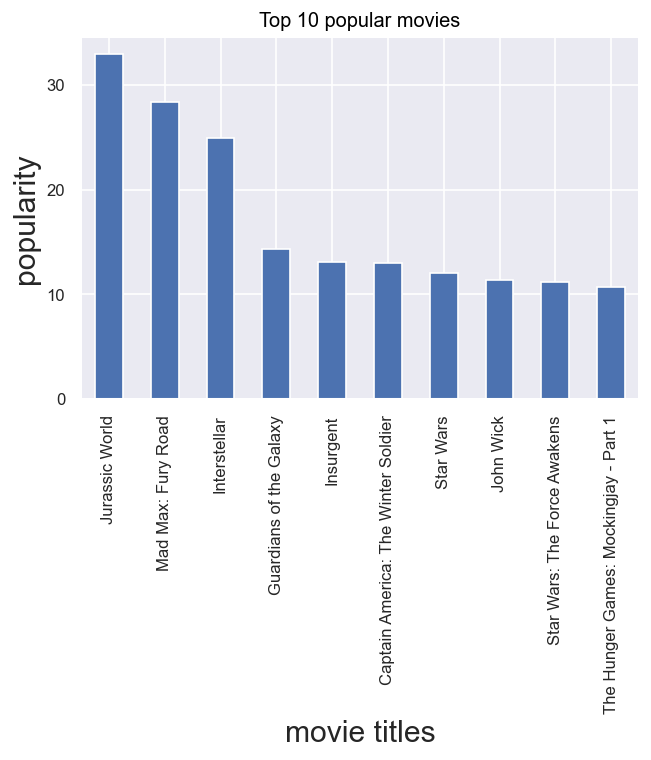

In [36]:
#now let's visualize this

plt.figure(figsize=(6,4), dpi = 120)
t10.plot.bar(fontsize = 10)
plt.title('Top 10 popular movies', color = 'black', fontsize = '12')
plt.xlabel('movie titles')
plt.ylabel('popularity');

> 💡Over the years, the top 3 movies that have made the rounds were **Jurassic World**, **Mad Max**(which i did not particular enjoy, but then we all have our preferences), and **Interstellar** (one of my all-time favorite, maybe because of it's music score by my one of my favorite musicians, Hans Zimmer)

### Research Question 4: What are the Top 10 rated movies?

In [37]:
#get top 10 movies by vote_average
top10_votes = movies_df.nlargest(10,'vote_average')
top10 = top10_votes.loc[:,['original_title', 'vote_average']].head(10)
top10

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
1200,Black Mirror: White Christmas,8.8
2269,Life Cycles,8.8
6911,Pink Floyd: Pulse,8.7
3690,The Art of Flight,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
8411,Queen - Rock Montreal,8.5
8839,Dave Chappelle: Killin' Them Softly,8.5
609,The Jinx: The Life and Deaths of Robert Durst,8.4


> 💡The table above shows **The Story of Film: An Odyssey** as the highest-rated movie over the period of analysis with an average of **9.2/10** rating score. This movie definitely performed well in box office. (I intend to check this movie out).

#### Let's visualize this in a chart below:

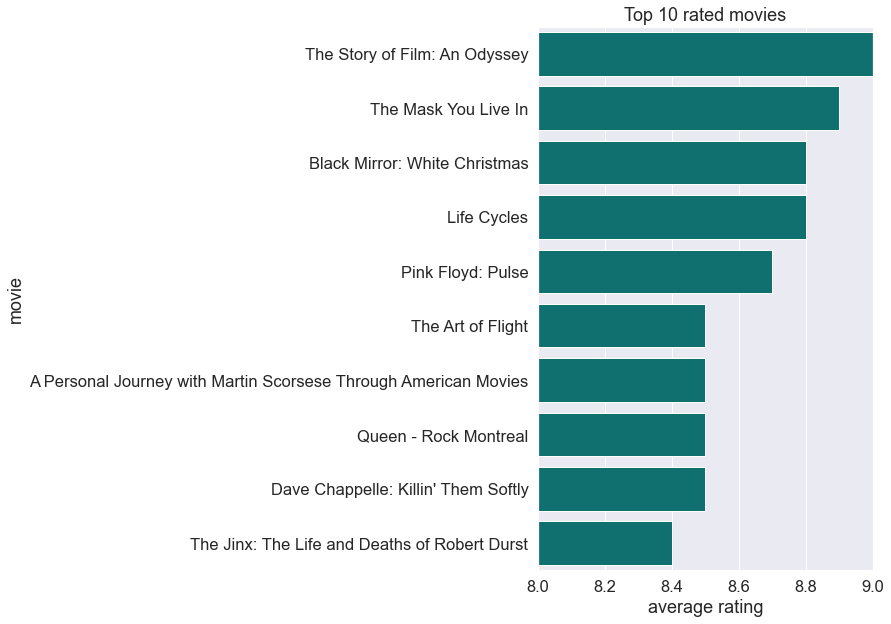

In [39]:
sns.set(font_scale=1.5);
f, ax = plt.subplots(figsize=(6, 10));
ax = sns.barplot(x='vote_average', y='original_title', data=top10, color='teal');

ax.set(xlim=(8,9), ylabel="movie", xlabel="average rating");
plt.title('Top 10 rated movies');

> 💡The chart visualizes and show the data in the table generated in output [37]. We see, as expected, **The Story of Film: An Odyssey** with the longest bar depicting that it is the movie that has raked the highest average rating over the period of analysis.

## Let's see how movies performed financially over the years

### Research Question 5: How have movie productions performed financially over the years?

Text(0.5, 1.0, 'year on year trend of budget, revenue, and profit')

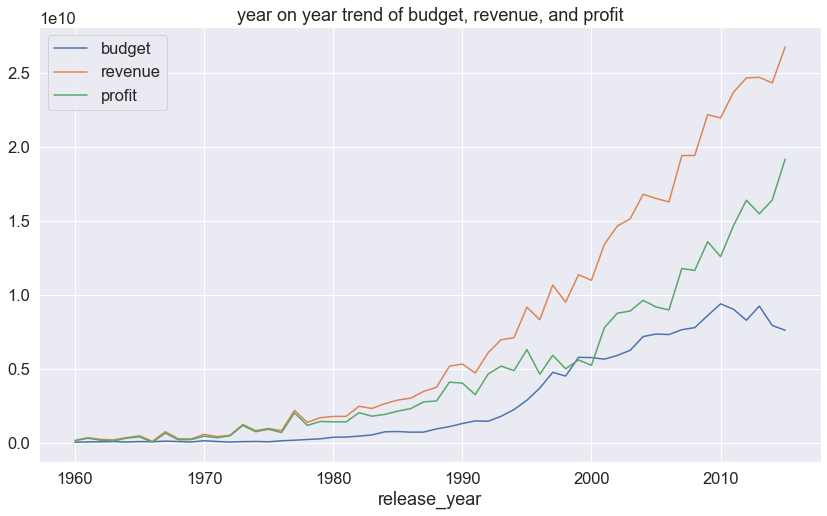

In [53]:
#let's observe some trends about the following financial metrics [budget, revenue, profit]
fin_metric=movies_df.groupby(movies_df.release_year)[["budget","revenue","profit"]].sum().plot(figsize=(14,8))
plt.title('year on year trend of budget, revenue, and profit')

> We notice an upward trend in **budget**, **revenue**, **profit**... This implies that, generally, over the years, funds have been increasingly devoted to movie production, which has translated to higher quality movies which have generated more revenue which in turn translate to higher profits.
> However, we observe some downward trends in budget in early 2000s, this may be due to the inclusion of budgets that are less than or equal to 0 in our model. But generally, budget seems to have been on an increase from 1960 to the 2000s.

#### We see an upward trend in these metrics but we should investigate which movies have been driving these growths in our financial metrics?

> Essentially, we want to see the top 10 profitable movies over the years

In [44]:
metrics = movies_df.groupby(['original_title','revenue','budget'])['profit'].sum()
metrics = metrics.reset_index().sort_values(by='profit', ascending=False)[:10]
metrics

,original_title,revenue,budget,profit
828,Avatar,2781505847,237000000,2544505847
7495,Star Wars: The Force Awakens,2068178225,200000000,1868178225
9892,Titanic,1845034188,200000000,1645034188
4509,Jurassic World,1513528810,150000000,1363528810
3267,Furious 7,1506249360,190000000,1316249360
7976,The Avengers,1519557910,220000000,1299557910
3664,Harry Potter and the Deathly Hallows: Part 2,1327817822,125000000,1202817822
830,Avengers: Age of Ultron,1405035767,280000000,1125035767
3248,Frozen,1274219009,150000000,1124219009
9096,The Net,1106279658,22000000,1084279658


> 💡We can see the movies that have contributed the most to the rising trend we observed in the line charts generated. Movies like **Avatar**, **Star Wars: The Force Awakens**, and the all-time classic, **Titanic** were the top 3 movies that have raked in the most profits, as shown in the table above.

## What are the possible explanations for these performances?

### Research Question 6.1: Do these observed increase in profits have anything to do with higher budgeting?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


correlation coeffiecient:  0.569940905326548


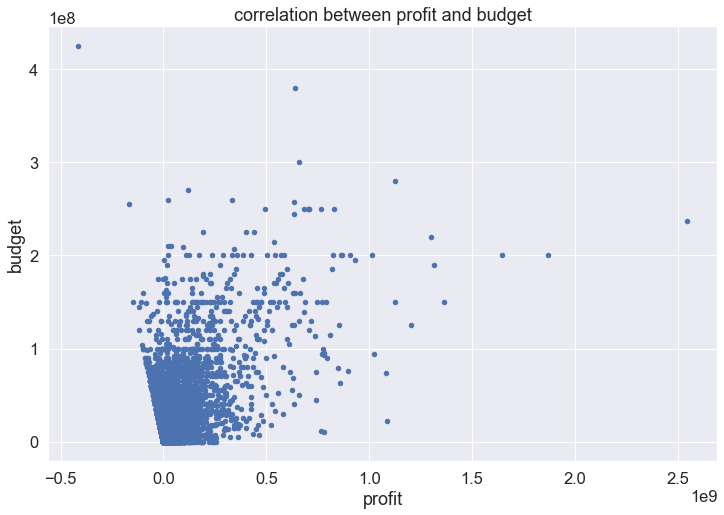

In [51]:
#Essentially, we want to see some correlations between profits and budget

movies_df.plot(x='profit', y='budget', kind='scatter', figsize=(12,8));
print('correlation coeffiecient: ', movies_df['profit'].corr(movies_df['budget']))
plt.title('correlation between profit and budget');

> 💡We see that **profit** and **budget** are fairly positively correlated with a correlation coefficient of about 57%. This suggests that the observed increasing trend in profits is likely due to the fact that there have been an increasing trend in budgets for movie production over the years.

### Research Question 6.2: Does increased budgeting explain why revenue tend to grow year on year?

> To answer this, we have to test for a correlation between budget and revenue

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


correlation coeffiecient:  0.7346852250748641


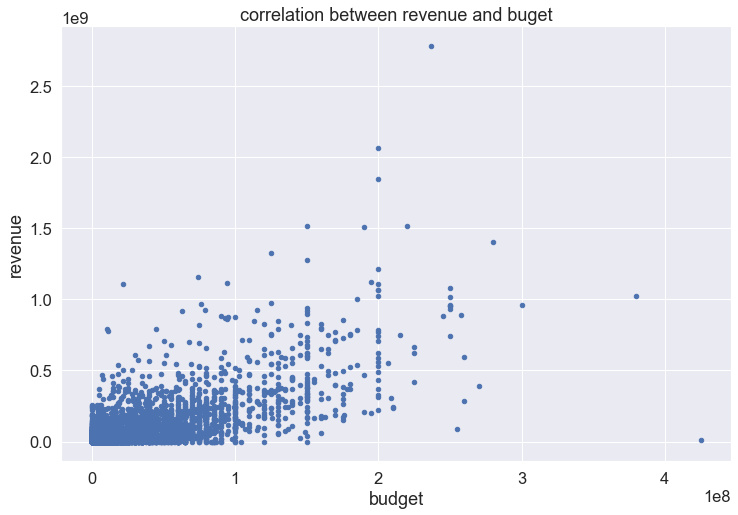

In [52]:
movies_df.plot(x='budget', y='revenue', kind='scatter', figsize=(12,8));
print('correlation coeffiecient: ', movies_df['budget'].corr(movies_df['revenue']))
plt.title('correlation between revenue and buget');

> 💡We see a strong correlation between budget and both reveue. So, it's clear that the year on year increase we see in revenue is as a result of movie producers devoting more money to their movie productions which resulted to the production of movies with higher grossing potentials, and it generated higher revenue.

<a id='conclusions'></a>
## Conclusions

We have come to the end of the research project, and some really interesting insights were gained, chief of which are:
> 💡The was an increased frequency of movie release after year 2000 compared to previous years, maybe due to an increase in demand, and market.<br>
> 💡Most movies released from 1960 to 2015 were rated from between 5 to 7 on a scale from 1-10. These movies were, in the opinion of most viewers, above average. <br>
> 💡Drama, Comedy, and Thriller were the top 3 movies popular amongst viewers who take time to give feedback about movies watched. And most viewers were not really much of a fan of Foreign, Western or TV Movies, as these 3 were least 3 popular.<br>
> 💡Woody Allen was the go-to guy when it comes to movie directing. He directed the most movies within the period of analysis.<br>
> 💡Even though, Jurasic World was most popular movie, An Odysey was the movie viewers rated the highest, and even despite that, Avatar was the most profitable movie produced within the period of analysis.<br>
> 💡Over the years, film makers have been pumping more money into movie production, and this has led to the production of higher quality movies which tends to guarantee increased revenue and profitability.

### This analysis project was faced with some limitations however. Some are:
<ul>
    <li> The 'genres' and 'director' columns contained missing rows, and removing these rows reduced the quality of our dataset
    <li> The budget and revenue columns were used as is (that is, the numerical value provided). No normalization procedure was followed. This may not paint accurate pictures of the financial implications of the datapoints.
    <li> This analysis is tentative and mainly for exploratory purposes only </ul>
  
Thank you for viewing my report. Your feedback will be well appreciated and kindly <a href="www.linkedin.com/in/ayobami-yusuf"> Click here </a> to follow me on LinkedIn.

